In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
from csv import reader  
from subprocess import check_output




# Reading in the file
df = pd.read_csv(filepath_or_buffer='G:\Anaconda\sms-20210328134858.xml\sms3.csv',encoding='utf-8')
print(df.head(2))

   Conversation        DateTime MessageType                Body
0    2695325568  8/7/2019 18:31    Received  Hey! It's Mallory 
1    2695325568  8/7/2019 18:31        Sent                Hey!


In [4]:
totals = df.groupby(df['MessageType']).count()
print(totals)



             Conversation  DateTime   Body
MessageType                               
Received            56585     56585  56023
Sent                56328     56328  55781


<function matplotlib.pyplot.show(close=None, block=None)>

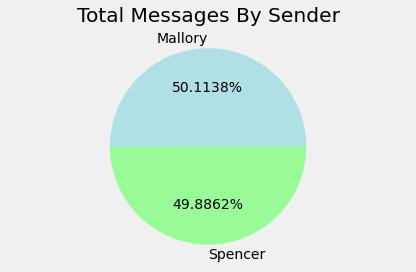

In [5]:
### NUMBERS
plt.style.use('fivethirtyeight')
labels = 'Mallory','Spencer'
sizes = 50.113804433501899,49.88619556649810030
##Pie Chart - Total Messages by Sender
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.4f%%', shadow=False, colors = ('powderblue','palegreen'),rotatelabels=0)
plt.title('Total Messages By Sender')
ax1.axis('equal')
plt.subplots_adjust(top=1.5)
plt.tight_layout()
plt.show

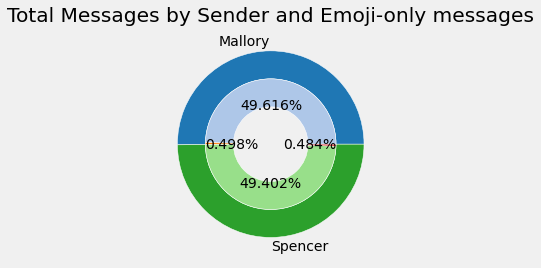

In [6]:
##Nested Pie Chart - Total Messages by Sender and Emoji-only messages
fig, ax = plt.subplots()

size = 0.3
vals = np.array([[0.496160761, 0.004977283], [0.494017518, 0.004844438]])

cmap = plt.get_cmap("tab20")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels =('Mallory','Spencer'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'),autopct='%0.3f%%')

ax.set(aspect="equal", title='Total Messages by Sender and Emoji-only messages')
plt.show()

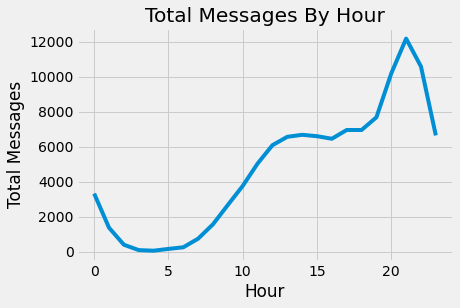

In [7]:
#When did we tend to chat?
df['DateTime'] = pd.to_datetime(df['DateTime'])

hour_totals = df.groupby(df['DateTime'].dt.hour)['MessageType'].count()

Hours = hour_totals


#'1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24'
Totals = hour_totals.value_counts()
plt.plot(hour_totals)
plt.title('Total Messages By Hour')
plt.xlabel('Hour')
plt.ylabel('Total Messages')
plt.show()

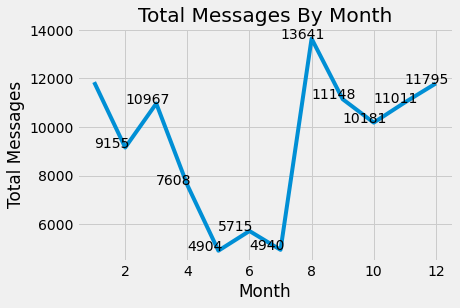

DateTime
1    11848
2     9155
3    10967
4     7608
5     4904
Name: MessageType, dtype: int64

In [8]:
#When did we tend to chat?
df['DateTime'] = pd.to_datetime(df['DateTime'])

month_totals = df.groupby(df['DateTime'].dt.month)['MessageType'].count()
plt.plot(month_totals)
for i, v in enumerate(month_totals):
    plt.annotate(str(v), xy=(i,v))

plt.title('Total Messages By Month')
plt.xlabel('Month')
plt.ylabel('Total Messages')
plt.show()
month_totals.head()

In [9]:
month_totals.head()

DateTime
1    11848
2     9155
3    10967
4     7608
5     4904
Name: MessageType, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

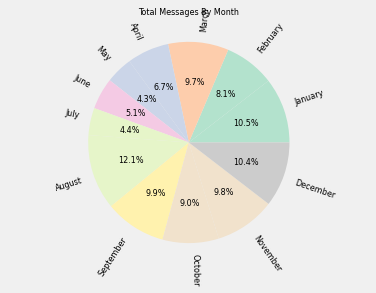

In [10]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title




##Pie Chart - Total Messages by Month
df['DateTime'] = pd.to_datetime(df['DateTime'])
month_totals = df.groupby(df['DateTime'].dt.month)['MessageType'].count()

labels = 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
fig1, ax1 = plt.subplots()
theme = plt.get_cmap('Pastel2')
ax1.set_prop_cycle("color", [theme(1. * i / len(labels))
                             for i in range(len(labels))])
ax1.pie(month_totals,labels=labels, autopct='%1.1f%%', shadow=False,rotatelabels=25)
plt.title('Total Messages By Month')
ax1.axis('equal')
plt.subplots_adjust(top=1.5)
plt.tight_layout()
plt.show

In [11]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



##Pie Chart - Total Messages by Month
df['DateTime'] = pd.to_datetime(df['DateTime'])
year_totals = df.groupby(df['DateTime'].dt.year)['MessageType'].count()
year_avgs = [176.918367,188.21311475,183.877551020]
labels = '2019','2020','2021'
fig1, ax1 = plt.subplots()
theme = plt.get_cmap('Pastel2')
ax1.set_prop_cycle("color", [theme(1. * i / len(labels))
                             for i in range(len(labels))])
ax1.pie(year_totals,labels=labels, autopct='%1.1f%%', shadow=False,rotatelabels=25)
plt.title('Total Messages By Year')
ax1.axis('equal')
plt.subplots_adjust(top=1.5)
plt.tight_layout()
plt.show


#average per year currently not working
fig2, ax2 = plt.subplots()
theme = plt.get_cmap('Pastel2')
ax2.set_prop_cycle("color", [theme(1. * i / len(labels))
                             for i in range(len(labels))])
ax2.bar(x=labels, year_avgs,height = 2)
plt.xticks(labels, x)
plt.title('Average Messages By Year')
plt.xlabel("Year")
plt.ylabel("Total Messages")
plt.subplots_adjust(top=1.5)
plt.tight_layout()
plt.show

SyntaxError: positional argument follows keyword argument (<ipython-input-11-04527332e767>, line 37)

In [1]:
import os
from PIL import Image
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


df = pd.read_csv(r"G:\Anaconda\sms-20210328134858.xml\sms3 - abbrev.csv", encoding ="latin-1")


stop_words = get_stop_words('english')

#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


data = pd.read_csv("G:\Anaconda\sms-20210328134858.xml\sms3 - Body only - Spencer.csv")
print(str(data))

stopwords = set(stopwords)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000000,
                          max_font_size=40, 
                          random_state=431,
                          normalize_plurals = True,
                          colormap = 'Set3'
                         ).generate(str(data))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Spencer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'pd' is not defined

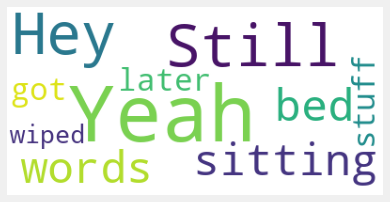

In [14]:
import sys
from os import path
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

# create set of stopwords	
stopwords = set(STOPWORDS)
data = pd.read_csv("G:\Anaconda\sms-20210328134858.xml\sms3 - Body only - Spencer.csv")

# create wordcloud object
wc = WordCloud(background_color="white",
max_words=10,
stopwords=stopwords)
# generate wordcloud
wc.generate(str(data))
    
plt.imshow(wc)
plt.axis('off')
plt.show()